## Course Announcements

- nothing due this week (yay!)
- A3 due next Sunday (11:59 PM)
- A1 grades posted on TritonEd
- Guest Lectures:
    - Friday 5/24 (wk 8) : Dr. Gina Merchant
    - Friday 5/31 (wk 9) : Dr. Brad Voytek


# Inference: Linear Regression

- **simple linear regression**
    - effect size
    - p-value
    - interpretation
- **multiple linear regression**
    - confounding
- working with **transformed data**

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 18})

import numpy as np

# Statmodels & patsy
import patsy
import statsmodels.api as sm

## The Question

Does Poverty Percentage affect Teen Birth Rate?

$H_o$: There is no relationship between poverty percentage and teen birth rate ($\beta = 0$)

$H_a$: There is a relationship between poverty percentage and teen birth rate ($\beta \ne 0$)

## The Data

In [3]:
# read in file; specify that it is tab-separated file
df = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/index.txt', sep='\t')
df.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


## Exploratory Plot

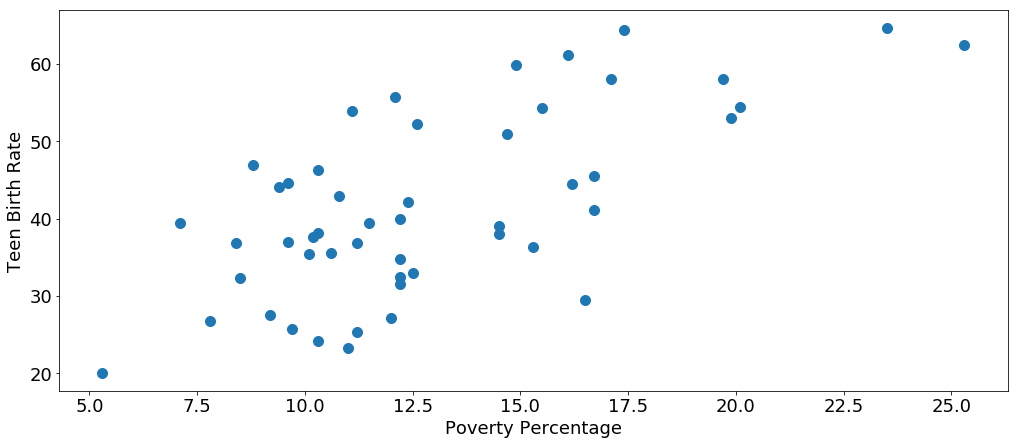

In [33]:
plt.scatter(df['PovPct'], df['TeenBrth'], s=100)
plt.xlabel('Poverty Percentage')
plt.ylabel('Teen Birth Rate');

We see there is some sort of relationship here, but we want to *measure that realtionship*. Linear regreasssion allows us to do that.

## Assumptions of Linear Regression

1. Linear relationship
2. Multivariate normality
3. No multicollinearity
4. No auto-correlation
5. Homoscedasticity


## Linear Regression

$$outcome = \beta_0 + \beta_1*predictor$$

First, let's be sure we're on the same page about what our outcome is. Here, we're intererested in whether **Poverty Percentage (predictor)** impacts **Teen Birth Rate (outcome)**.

We can specify our design matrix using `patsy`.

In [5]:
outcome, predictors = patsy.dmatrices('TeenBrth ~ PovPct', df)

Now, that those are specified, let's run the model, using `statsmodels`.

In [6]:
mod = sm.OLS(outcome, predictors)

And, then we just have to fit the model and look at the results.

In [7]:
## fit the model
res = mod.fit()

## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     47.95
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.67e-09
Time:                        11:09:34   Log-Likelihood:                -182.53
No. Observations:                  51   AIC:                             369.1
Df Residuals:                      49   BIC:                             372.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6737      4.032      3.888      0.0

## Clicker Question

What is the effect size of the relationship between Poverty Percentage and Teen Birth Rate?

- A) 15.67
- B) 2.03
- C) 4.032
- D) 0.495

There is a lot of information in there. Let's focus on the three pieces we discussed last lecture:

- `coef` : $\beta$ estimate explaining the effect size
- `std err` : standard error 
- `P>|t|` : the p-value

## Interpretation

$$outcome = \beta_0 + \beta_1*predictor$$

$$ Teen Birth = 15.67 + 2.03  * Poverty Percentage $$

If the Poverty Percentage were 0, the Teen Birth Rate would be **15.67** (The Intercept, $\beta_0$)

For every 1 unit increase in Poverty Percentage, you expect to see a **2.03** unit increase in Teen Birth Rate (The effect size, $\beta_1$)

In [8]:
## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     47.95
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.67e-09
Time:                        11:09:34   Log-Likelihood:                -182.53
No. Observations:                  51   AIC:                             369.1
Df Residuals:                      49   BIC:                             372.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6737      4.032      3.888      0.0

## Clicker Question

Which value represents the expected Teen Birth Rate if the Poverty Percentage were 0?

- A) 15.67
- B) 2.03
- C) 4.032
- D) 0.495

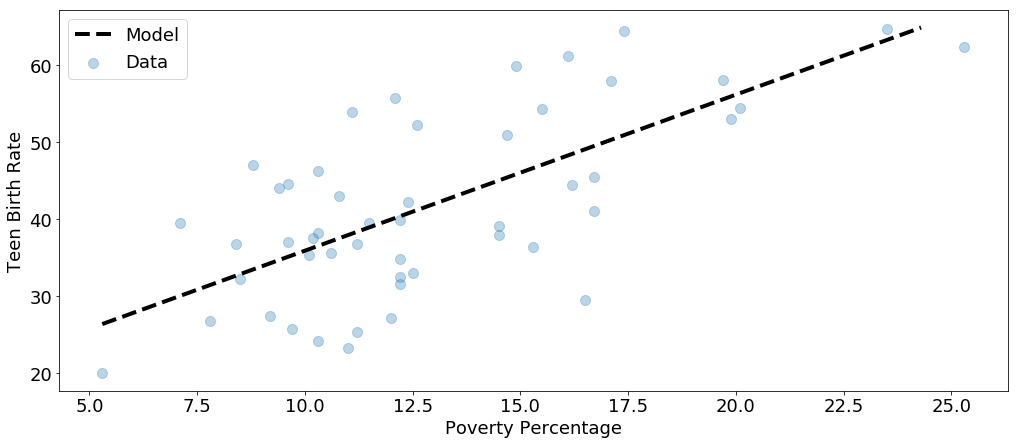

In [34]:
## Plot the model fit line

# Plot the orginal data (as before)
plt.scatter(df['PovPct'], df['TeenBrth'], alpha=0.3, label='Data', s=100);

# Generate and plot the model fit line
xs = np.arange(df['PovPct'].min(), df['PovPct'].max())
ys = 2.0255 * xs + 15.67
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Poverty Percentage')
plt.ylabel('Teen Birth Rate')
plt.legend();

This is what we saw on Monday. The model (the line) mathematically describes the relationship between the data points, but it doesn't explain the relationship *perfectly*. (All models are wrong!)

Note that this line is drawn in the following way:
- if you were to draw a perpendicular line from each point to the line and calculate that distance
- if you were to sum the distance across all points
- this line is the one that minimizes that sum

## Clicker Question

If I told you the Poverty Percentage of a state was 15, what would you estimate would be its Teen Birth Rate? 
- A) ~ 0
- B) ~ 30
- C) ~ 40
- D) ~ 50
- E) ~ 60

In [10]:
## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     47.95
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.67e-09
Time:                        11:09:34   Log-Likelihood:                -182.53
No. Observations:                  51   AIC:                             369.1
Df Residuals:                      49   BIC:                             372.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6737      4.032      3.888      0.0

$$ Teen Birth = 15.67 + 2.03  * Poverty Percentage $$

## Clicker Question

Which of the following is a reasonable estimate (guess) for a state with a Poverty Percentage of 20?

- A) 55.99
- B) 56.27
- C) 56.5
- D) A - C
- E) None of the above

## Predictions

If I told you a locations' Poverty Percentage, what would you guess its Teen Birth Rate would be?

$$ Teen Birth = 15.67 + 2.03  * Poverty Percentage $$

In [11]:
## if Poverty Percentage were 18
birth_rate = 15.67 + 2.03 * 18
birth_rate

52.21

In [12]:
## if Poverty Percentage were 12
birth_rate = 15.67 + 2.03 * 12
birth_rate

40.03

## Clicker Question

What is our conclusion from this analysis? (Question: Does Poverty Percentage affect Teen Birth Rate?)

- A) Reject the null; There is no relationship between Poverty Percentage and Teen Birth Rate
- B) Reject the null; There is a relationship between Poverty Percentage and Teen Birth Rate
- C) Fail to reject the null; There is no relationship between Poverty Percentage and Teen Birth Rate
- D) Fail to reject the null; There is a relationship between Poverty Percentage and Teen Birth Rate


# Multiple Linear Regression

So far, we've only been looking at the relationship of one measure (Poverty Percentage) on Teen Birth. 

*But*, Poverty Percentage is likely *not* the only thing that affects Teen Birth Rate.

We could imagine that Violent Crime rates in a location may affect both Poverty Percentage and could possibly affect Teen Birth Rate. (A confounder!)

This is where **multiple linear regression** is incredibly helpful. Multiple linear regression allows you to measure the effect of multiple predictors on an outcome.

In [13]:
outcome, predictors = patsy.dmatrices('TeenBrth ~ PovPct + ViolCrime ', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     30.68
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.61e-09
Time:                        11:09:34   Log-Likelihood:                -178.93
No. Observations:                  51   AIC:                             363.9
Df Residuals:                      48   BIC:                             369.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.6848      3.869      4.571      0.0

## Clicker Question

Which has a larger effect on Teen Birth Rate?

- A) Poverty Percentage
- B) Violent Crime
- C) Effect is equal across all predictors
- D) No predictors have an effect on outcome

$$ Teen Birth = 17.68 + (1.63  * Poverty Percentage) + (0.4 * Violent Crime) $$

If the Poverty Percntage *and* Violent Crime were both 0, the Teen Birth Rate would be **17.68** (The Intercept)

Holding Violent crime constant, for every 1 unit increase in Poverty Percentage, you expect to see a **1.63** unit increase in Teen Birth Rate (The effect size, $\beta_1$)

Holding Poverty Percentage constant, for every 1 unit increase in Violent crime, you'd expect to see a **0.4** unit increase in Teen Birth Rate (The effect size, $\beta_2$)

## No Multiple Colinearity

If we have two predictors, we'll want to consider how similar the values are between predictors (typically, before your generate the model, but we'll do it after for sake of argument today).

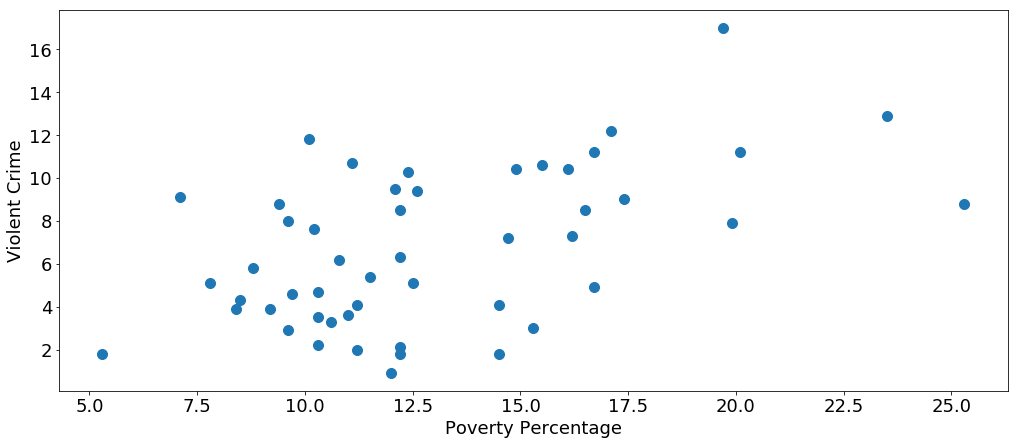

In [35]:
# relationship between predictors
plt.scatter(df['PovPct'], df['ViolCrime'], s=100);
plt.xlabel('Poverty Percentage')
plt.ylabel('Violent Crime');

In [15]:
df[df['ViolCrime']>50]

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
8,District_of_Columbia,22.0,44.8,101.5,65.0,69.1


### Outlier handling

In [16]:
# removing DC
df = df[df['ViolCrime'] < 50]

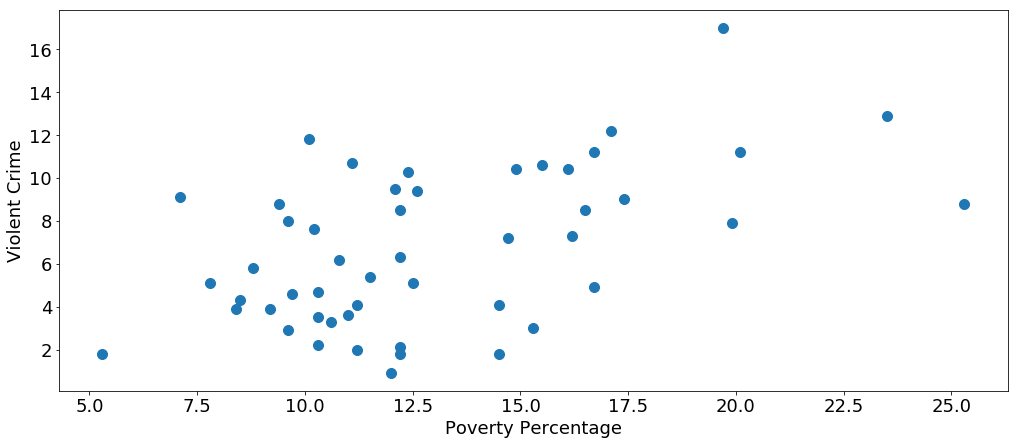

In [36]:
# relationship between predictors
# after removing outlier
plt.scatter(df['PovPct'], df['ViolCrime'], s=100);
plt.xlabel('Poverty Percentage')
plt.ylabel('Violent Crime');

In [18]:
# run model
outcome, predictors = patsy.dmatrices('TeenBrth ~ PovPct + ViolCrime ', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     41.17
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.67e-11
Time:                        11:09:34   Log-Likelihood:                -168.65
No. Observations:                  50   AIC:                             343.3
Df Residuals:                      47   BIC:                             349.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.3419      3.431      4.471      0.0

Holding Violent crime constant, for every 1 unit increase in Poverty Percentage, you expect to see a **1.63** unit increase in Teen Birth Rate (The effect size, $\beta_1$)

Holding Poverty Percentage constant, for every 1 unit increase in Violent crime, you'd expect to see a **1.19** unit increase in Teen Birth Rate (The effect size, $\beta_2$)

## Clicker Question

Which has a larger effect on Teen Birth Rate?

- A) Poverty Percentage
- B) Violent Crime
- C) Effect is equal across all predictors
- D) No predictors have an effect on outcome

Removing the DC outlier led to a different estimate for the effect of violent crime in these data. The inclusion or removal of data in your analyses can affect the results, so it's always important to carefully consider what question you're asking and 

# Regression with transformed data

So far, we've been working with data that were approximately Normal and didn't require transformation. But that won't always be the case...

In [19]:
sleep = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/msleep.csv')
sleep.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


What if we were interested in quantifying the **effect that REM sleep has on total sleep**?

We may hypothesize that the more REM sleep an animal gets the less total sleep it needs.

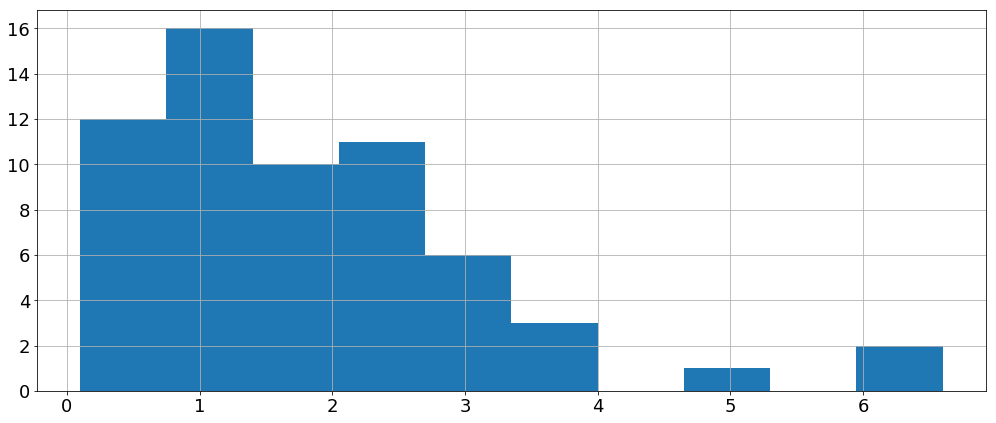

In [37]:
sleep['sleep_rem'].hist();

We saw previously that these data are skewed right, and discussed that transforming these data could help us use them in analysis...

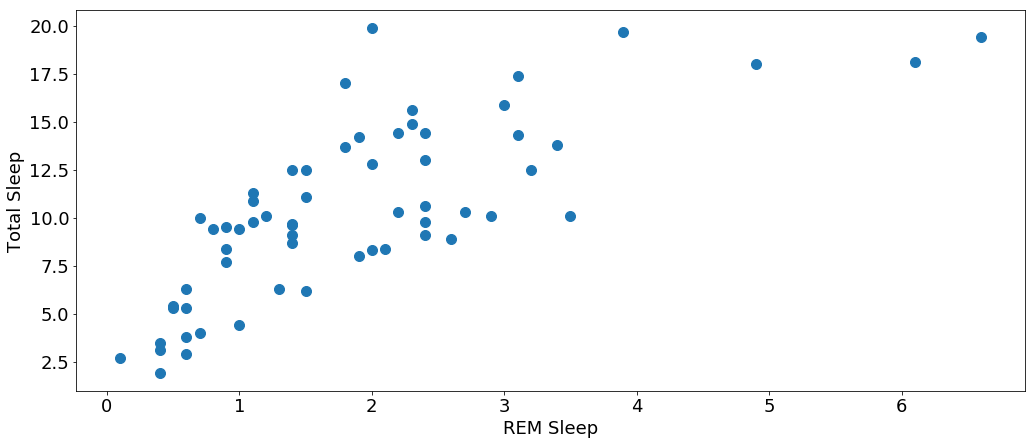

In [46]:
plt.scatter(sleep['sleep_rem'], sleep['sleep_total'], s=100)
plt.xlabel('REM Sleep')
plt.ylabel('Total Sleep');

This relationship is not linear...so linear regression would not be appropriate

### Log Transformation

In [22]:
# add log-transofmed column to sleep_rem & brainwt
sleep['sleep_rem10'] = np.log10(sleep['sleep_rem'])

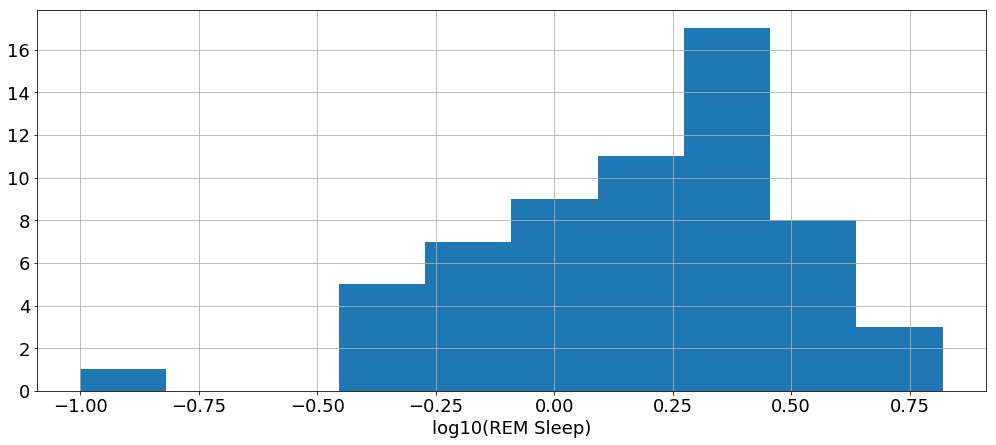

In [43]:
sleep['sleep_rem10'].hist()
plt.xlabel('log10(REM Sleep)');

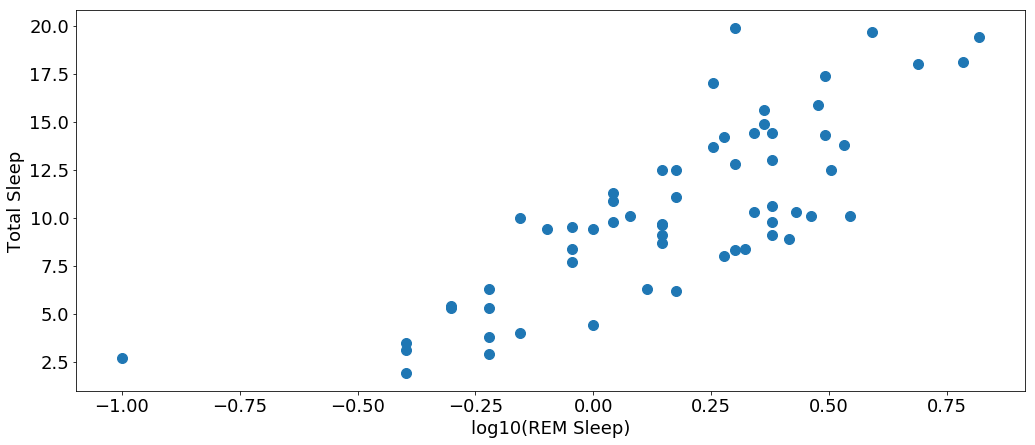

In [47]:
plt.scatter(sleep['sleep_rem10'], sleep['sleep_total'], s=100)
plt.xlabel('log10(REM Sleep)')
plt.ylabel('Total Sleep');

### Linear regression with transformed data

In [25]:
# carry out regression using log-transformed predictor
outcome, predictors = patsy.dmatrices('sleep_total ~ sleep_rem10', sleep)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            sleep_total   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     100.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.18e-14
Time:                        11:09:35   Log-Likelihood:                -147.84
No. Observations:                  61   AIC:                             299.7
Df Residuals:                      59   BIC:                             303.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.5686      0.399     21.473      

Here, we see that the $\beta$ estimate for `sleep_rem10` is 10.89....but remember that this value is on the log scale.

$$ Total Sleep = 8.57 + 10.89  * log_{10}(REM Sleep) $$

To interpret this coefficient, we would say that

a 1 unit increase in REM sleep, Total Sleep increases by $\approx$ $10.89/100$ units.

In [26]:
# interpreting a log transformed coefficient
10.89 / 100

0.10890000000000001

So, for each 1 hour increase in REM Sleep, Total Sleep increases by 0.11 hours. 

That's not a large effect, but it is different than what we hypothesized at the beginning!

More on interpretation of log transformed variables can be read [here](https://www.cscu.cornell.edu/news/statnews/stnews83.pdf)